### Import Libraries

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

### Inspect Data

In [4]:
df.head()
#There are three scores. May create an additional score 
#  that averages all three. Each of the scores will be a target 
#  variable/feature


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()
# There are 1000 rows of data and 8 columns/features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
# Create a final/overall score from math, reading, and writing

df['overall score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Data Exploration: Overall Performance by Gender and (Race/ethnicity, Parental level of education, lunch type, and test preparation


C:\Users\dewum\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


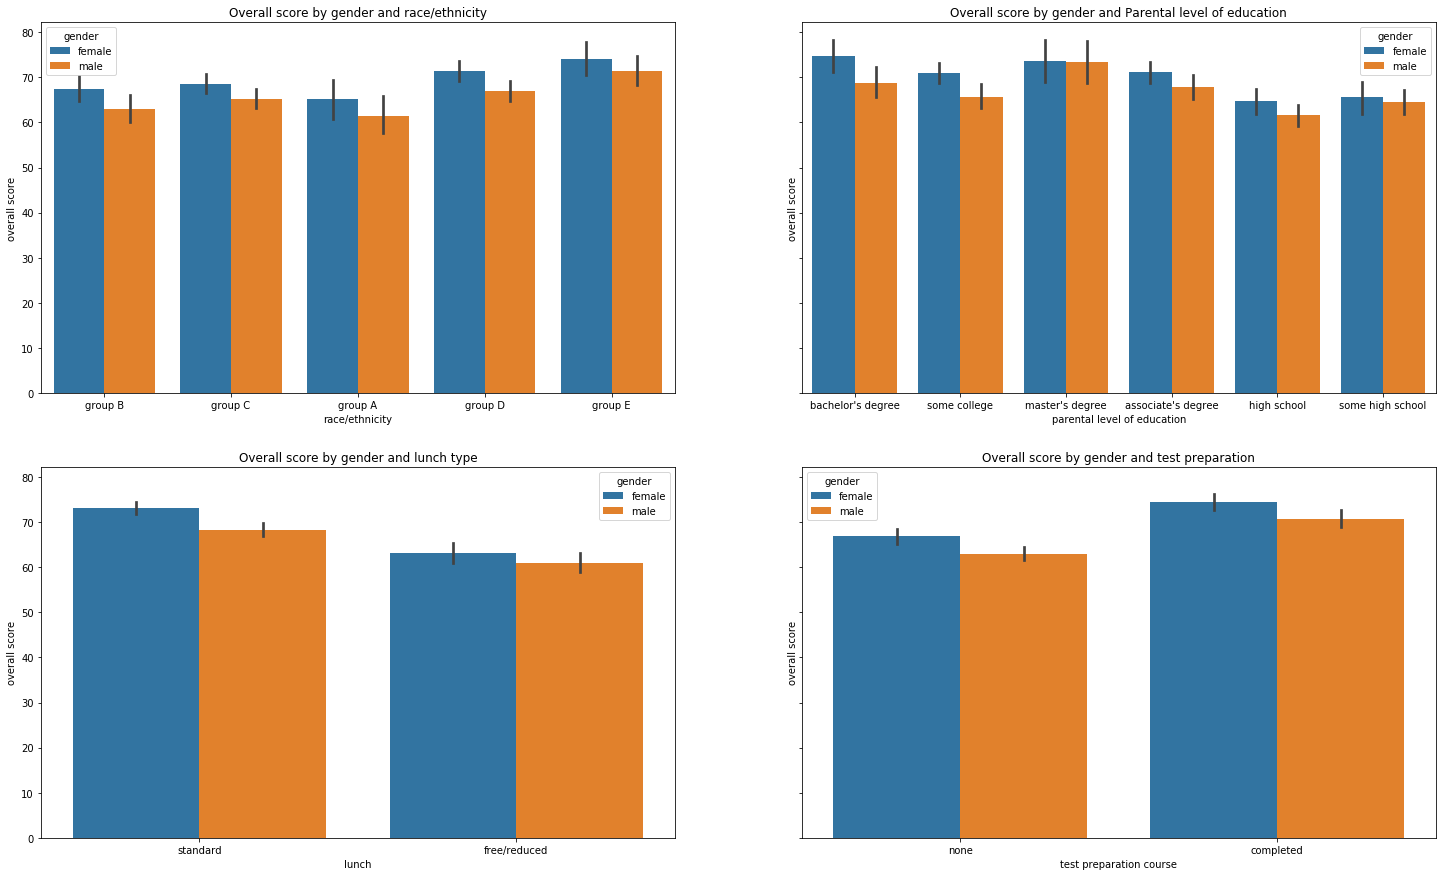

In [9]:
#Explore scores by parental level of education
fig, axs = plt.subplots(ncols=2, nrows=2,  figsize=(25, 15), sharey = True)
sns.barplot(x=df['race/ethnicity'], y=df['overall score'], hue=df['gender'], ax=axs[0][0]).set_title('Overall score by gender and race/ethnicity')
sns.barplot(x=df['parental level of education'], y=df['overall score'], hue=df['gender'], ax=axs[0][1]).set_title('Overall score by gender and Parental level of education')
sns.barplot(x=df['lunch'], y=df['overall score'], hue=df['gender'], ax=axs[1][0]).set_title('Overall score by gender and lunch type')
sns.barplot(x=df['test preparation course'], y=df['overall score'], hue=df['gender'], data=df, ax=axs[1][1]).set_title('Overall score by gender and test preparation')

plt.show()

#### Transformation of non-normal, target features: Math, Reading and writing

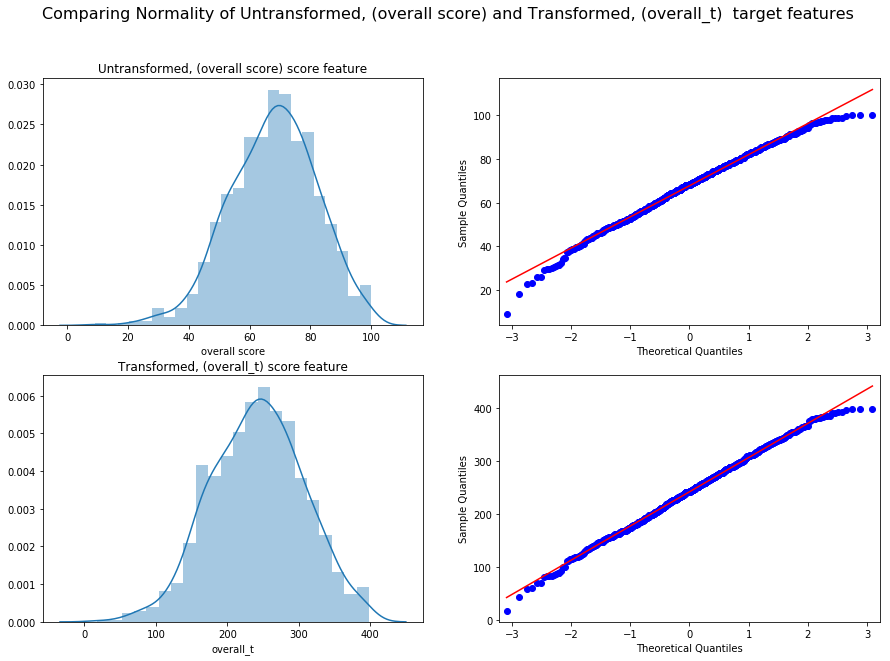

<Figure size 360x3600 with 0 Axes>

overall score - Reject null. Not normal
p=0.0005 

overall_t - Fail to reject null. Normal
p=0.2498 



In [10]:
#Transform the math score to normalize it.
import math as m

#Test of Normality for the Math score
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

def transform_vars(untransformed, transformed):
    # Transformation of math score
    x = lambda x: (m.pow(x,1.3))
    df_t = df['{}'.format(untransformed)].apply(x)
    df['{}'.format(transformed)] = pd.Series(df_t, index=df.index) 

    
# Plot both Untransformed and Transformed plots of test performance
def compare_normality(untransformed, transformed):
    fig, axs = plt.subplots(ncols=2, nrows = 2, figsize=(15, 10))
    plt.figure(figsize=(5,50))
    f = sns.distplot(df['{}'.format(untransformed)], ax=axs[0][0]).set_title('Untransformed, ({}) score feature'.format(untransformed))
    f = sns.distplot(df['{}'.format(transformed)], ax=axs[1][0]).set_title('Transformed, ({}) score feature'.format(transformed))
    f = qqplot(df['{}'.format(untransformed)], line='s', ax=axs[0][1]) 
    f = qqplot(df['{}'.format(transformed)], line='s', ax=axs[1][1]) 
    fig.suptitle('Comparing Normality of Untransformed, ({}) and Transformed, ({})  target features'.format(untransformed, transformed), fontsize=16)

    plt.show()
    
#Test the normality of the original and transformed scores
def checkNormal(var):
    k2, p = stats.normaltest(df['{}'.format(var)])
    alpha = 0.05
    if p < alpha:
        print(var,"- Reject null. Not normal")
    else:
        print(var,"- Fail to reject null. Normal")
    p = round(p,4)    
    print ("p={}".format(p), "\n")


# Math
transform_vars('overall score', 'overall_t')
compare_normality('overall score','overall_t')
checkNormal('overall score') #Untransformed math score
checkNormal('overall_t') #Transformed math score



### Create X and Y datasets

In [11]:
#Since the predictors are categorical, consider using ANOVA?
#For 1b, use categorical variable without dummying.

# from statsmodels.formula.api import ols

# fit = ols("Q('overall score') ~ C(gender) + C(lunch) + C(Q('race/ethnicity')) + C(Q('parental level of education')) + C(Q('test preparation course'))", data=df).fit()
# fit.summary()


#before spliting data, create dummies for categorical variables (drop first column of each dummy group to avoid multicollinearity)
df_d = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'lunch', 'test preparation course'], drop_first=True)
df2 = df_d.drop(['math score', 'writing score', 'reading score', 'overall_t'], axis=1)
df2.head()
# df_keep 

,parental level of education,overall score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,bachelor's degree,72.666667,0,1,0,0,0,1,1
1,some college,82.333333,0,0,1,0,0,1,0
2,master's degree,92.666667,0,1,0,0,0,1,1
3,associate's degree,49.333333,1,0,0,0,0,0,1
4,some college,76.333333,1,0,1,0,0,1,1


In [12]:
df2['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [13]:
#Recategorize the parental education to reflect it's ordinal nature

recat_parent_ed = {"some high school":1,
                                      "high school":2,
                                      "some college":3,
                                      "associate's degree":4,
                                      "bachelor's degree":5,
                                      "master's degree":6}

#Then, replace the feature in the DataFrame
df2.replace(recat_parent_ed, inplace=True)
# df2["parental level of education"]=df["parental level of education"].replace(recat_parent_ed, inplace=True)

df2.head()


,parental level of education,overall score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,5,72.666667,0,1,0,0,0,1,1
1,3,82.333333,0,0,1,0,0,1,0
2,6,92.666667,0,1,0,0,0,1,1
3,4,49.333333,1,0,0,0,0,0,1
4,3,76.333333,1,0,1,0,0,1,1


In [14]:
df2.dtypes

parental level of education       int64
overall score                   float64
gender_male                       uint8
race/ethnicity_group B            uint8
race/ethnicity_group C            uint8
race/ethnicity_group D            uint8
race/ethnicity_group E            uint8
lunch_standard                    uint8
test preparation course_none      uint8
dtype: object

In [15]:
df2["parental level of education"] = df2["parental level of education"].astype('category')
df2["parental education"] = df2["parental level of education"].cat.codes



In [16]:
df2 = df2.drop(['parental level of education'], axis=1)
df2.head()

,overall score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none,parental education
0,72.666667,0,1,0,0,0,1,1,4
1,82.333333,0,0,1,0,0,1,0,2
2,92.666667,0,1,0,0,0,1,1,5
3,49.333333,1,0,0,0,0,0,1,3
4,76.333333,1,0,1,0,0,1,1,2


In [17]:
# Split data into x and y
X = df2.drop(['overall score'], axis=1)
y = df2['overall score']
# X.head()

In [18]:
y.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: overall score, dtype: float64

### Train and Test Models|

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [20]:
import statsmodels.api as sm

olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
print(olsres.summary())


                            OLS Regression Results                            
Dep. Variable:          overall score   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1085.
Date:                Tue, 23 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:22:27   Log-Likelihood:                -3047.9
No. Observations:                 700   AIC:                             6112.
Df Residuals:                     692   BIC:                             6148.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
gender_male     

In [23]:
from statsmodels.tools.eval_measures import rmse

# Prediction
ypred = olsres.predict(X_test)
# print(ypred.head())
# print(y_test.head())


# calc rmse
rmse = rmse(y_test, ypred)
print ('RMSE:',round(rmse,4))

RMSE: 20.3011


In [216]:
#Evaluate the ols from statsmodels.api
def toFrame(ySeries, yname):
    y = pd.DataFrame(ySeries, columns = ['{}'.format(yname)])
    return y
     


#Convert Series to DataFrame for easier use
y_pred0 = toFrame(ypred, 'predicted overall score')
y_test0 = toFrame(y_test,'overall score')

In [199]:
import math as m
dfTrue_Pred0 = pd.concat([y_test0, y_pred0], axis=1, sort=False)
 
def RMSE(true, predicted):
    global MSE, RMSE
    SE = (true - predicted).apply(lambda x: (m.pow((x),2)))
    SSE = (SE.sum())
    n = len(SE)
    MSE = SSE/n;
    RMSE = m.sqrt(MSE)
    return RMSE


print ('RMSE:',round(RMSE(dfTrue_Pred0['predicted overall score'],dfTrue_Pred0['overall score']),4))

RMSE: 20.3011


### Cross-validation

In [42]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import StratifiedKFold
# from sklearn.cross_validation import KFold
cv = StratifiedKFold(n_splits=10, random_state=101, shuffle=False)

for train_index, test_index in cv.split(df2):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))


TypeError: split() missing 1 required positional argument: 'y'

In [34]:
# for train_index, test_index in kf.split(df2):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     ('TRAIN:', array([2, 3]), 'TEST:', array([0, 1]))
#     ('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))

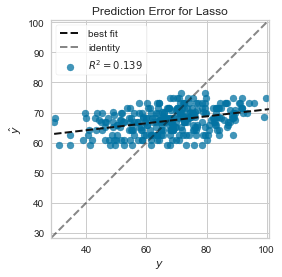

In [201]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

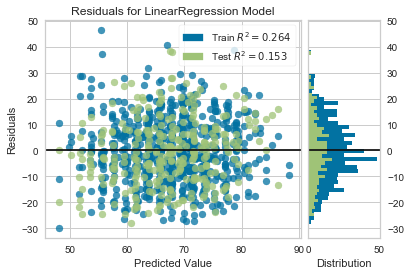

In [202]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

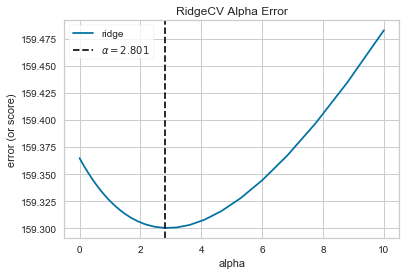

In [203]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X_train, y_train)
visualizer.poof()

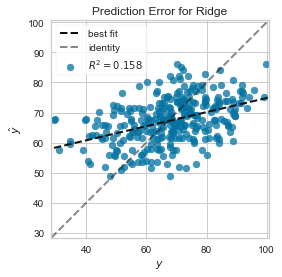

In [210]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(Ridge(alpha=2.8))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [205]:
#Use more complex model: Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
pred = tree_reg.predict(X_test)


scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

# def RMSE_mod(true, predicted):
#     global MSE, RMSE
#     SE = (true - predicted).apply(lambda x: (x*x))
#     SSE = (SE.sum())
#     n = len(SE)
#     MSE = SSE/n;
#     RMSE = m.sqrt(MSE)
#     return RMSE

# pred_df = pd.DataFrame(data=pred.flatten(), columns=['predicted overall score'])
# # pred_df.head()
# ytest_ = (pd.DataFrame(data=y_test, columns=['overall score'])).reset_index(drop=True)
# # tree_mse = mean_squared_error(X_train, y_train)

# dfTrue_Pred3 = pd.concat([ytest_, pred_df], axis=1, sort=False)
# RMSE_mod(dfTrue_Pred3['overall score'], dfTrue_Pred3['predicted overall score'])
# # dfTrue_Pred3.head()

array([13.53811955, 15.40653787, 14.24575864, 15.06034209, 15.29335404,
       13.73541006, 15.73997627, 16.87609589, 14.81922613, 16.60508567])

In [206]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
# forest_reg.score(X_train, y_train)
frstypred=forest_reg.predict(X_test)

C:\Users\dewum\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [207]:
def RMSE_mod(true, predicted):
    global MSE, RMSE
    SE = (true - predicted).apply(lambda x: (x*x))
    SSE = (SE.sum())
    n = len(SE)
    MSE = SSE/n;
    RMSE = m.sqrt(MSE)
    return RMSE

In [208]:
pred_df = pd.DataFrame(data=frstypred.flatten(), columns=['predicted overall score'])
# pred_df.head()
ytest_ = (pd.DataFrame(data=y_test, columns=['overall score'])).reset_index(drop=True)
# tree_mse = mean_squared_error(X_train, y_train)

dfTrue_Pred4 = pd.concat([ytest_, pred_df], axis=1, sort=False)
RMSE_mod(dfTrue_Pred4['overall score'], dfTrue_Pred4['predicted overall score'])
# dfTrue_Pred3.head()



14.363389764724072

In [209]:
from sklearn.metrics import explained_variance_score
print ('Explained variance score:',explained_variance_score(dfTrue_Pred4['overall score'],dfTrue_Pred4['predicted overall score']))

from sklearn.metrics import r2_score
print ('R2 Score:',r2_score(dfTrue_Pred4['overall score'], dfTrue_Pred4['predicted overall score']))

Explained variance score: -0.1182546296571545
R2 Score: -0.11827267434073896


#### Using the  ols from statsmodels.api, the following model metrics were obtained:
     R-squared: 0.92
     AIC: 6158
     BIC: 6213
     RMSE: 19.65
     
     However, the Explained variance score (-0.065) and R2 Score (-0.070)
     suggests that the above model may not be a good fit.


### The above used dummied categorical variables. We now explore another ols approach (statsmodels.formula.api) leaving the categorical variables as is, without creating dummies

In [50]:
# df_d = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)
df3 = df.drop(['math score', 'writing score', 'reading score', 'overall_t'], axis=1)
df3.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,overall score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [51]:
from sklearn.model_selection import train_test_split

X_ = df3.drop(['overall score'], axis=1)
y_ = df3['overall score']


X_train1, X_test1, y_train1, y_test1 = train_test_split(X_, y_, test_size=0.3, random_state=101)

dfTrain = pd.concat([y_train1, X_train1], axis=1, sort=False)
dfTest = pd.concat([y_test1, X_test1], axis=1, sort=False)

dfTest.head()

,overall score,gender,race/ethnicity,parental level of education,lunch,test preparation course
545,80.333333,male,group E,some high school,free/reduced,completed
298,45.333333,male,group C,high school,free/reduced,completed
109,68.666667,female,group B,some high school,standard,none
837,78.666667,female,group A,high school,standard,completed
194,79.333333,female,group C,master's degree,standard,completed


In [52]:

# Try regression model without dummy coding
from statsmodels.formula.api import ols
from patsy.builtins import *


#Test models for overall scores for train data
# fit1 = ols("Q('overall score') ~ C(gender) + C(lunch) + C(Q('race/ethnicity')) + C(Q('parental level of education')) + C(Q('test preparation course'))", data=dfTrain).fit()
fit1 = ols("Q('overall score') ~ C(gender) + C(lunch) + C(Q('race/ethnicity')) + C(Q('parental level of education')) + C(Q('test preparation course'))", data=dfTrain).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('overall score')   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     21.03
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           1.28e-39
Time:                        00:42:58   Log-Likelihood:                -2756.9
No. Observations:                 700   AIC:                             5540.
Df Residuals:                     687   BIC:                             5599.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   65.4665      2.091     31.307      0.000      61.361      69.572
C(gender)[T.male]                                           -3.8992      0.960     -4.063      0.000      -5.784      -2.015
C(lunch)[T.standard]                                        10.2183      1.009     10.127      0.000       8.237      12.199
C(Q('race/ethnicity'))[T.group B]                            1.7636      1.886      0.935      0.350      -1.939       5.466
C(Q('race/ethnicity'))[T.group C]                            3.4611      1.765      1.960      0.050      -0.005       6.927
C(Q('race/ethnicity'))[T.group D]                            5.6066      1.798      3.118      0.002       2.077       9.137
C(Q('race/ethnicity'))[T.group E]                            8.6538      2.015      4.294      0.000       4.697      12.611
C(Q('parental level of education'))[T.bachelor's degree]     2.1812      1.703      1.281      0.201      -1.162       5.524
C(Q('parental level of education'))[T.high school]          -5.7150      1.497     -3.818      0.000      -8.654      -2.776
C(Q('parental level of education'))[T.master's degree]       2.7139      2.211      1.227      0.220      -1.627       7.055
C(Q('parental level of education'))[T.some college]         -1.0327      1.406     -0.735      0.463      -3.793       1.727
C(Q('parental level of education'))[T.some high school]     -5.5509      1.497     -3.708      0.000      -8.490      -2.612
C(Q('test preparation course'))[T.none]                     -7.4684      0.996     -7.502      0.000      -9.423      -5.514
==============================================================================
Omnibus:                        7.280   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.433
Skew:                          -0.248   Prob(JB):                       0.0243
Kurtosis:                       2.903   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
y_pred = fit1.predict(X_test1)
def toFrame(ySeries, yname):
    y = pd.DataFrame(ySeries, columns = ['{}'.format(yname)])
    return y
     


#Convert Series to DataFrame for easier use
y_pred1 = toFrame(y_pred, 'predicted overall score')
y_test1 = toFrame(dfTest['overall score'],'overall score')



In [54]:
import math as m
dfTrue_Pred = pd.concat([y_test1, y_pred1], axis=1, sort=False)
 
def RMSE(true, predicted):
    global MSE, RMSE
    SE = (true - predicted).apply(lambda x: (m.pow((x),2)))
    SSE = (SE.sum())
    n = len(SE)
    MSE = SSE/n;
    RMSE = m.sqrt(MSE)
    return RMSE


round(RMSE(dfTrue_Pred['overall score'], dfTrue_Pred['predicted overall score']),4)

12.5058

#### From the alternative ols package (statsmodels.formula.api) the model metrics are:
    R-Squared: 0.256
    AIC: 5540
    BIC: 5599
    RMSE: 12.51

### The higher R-square in the previous model might be due to autocorrelations within dummy variables

In [55]:
# from sklearn.metrics import r2_score
# r2_score(dfTrue_Pred['overall score'], dfTrue_Pred['predicted overall score'])

from sklearn.metrics import explained_variance_score
explained_variance_score(dfTrue_Pred['overall score'], dfTrue_Pred['predicted overall score'])

0.15462452389989845